# Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import csv dan memisahkan kolom agar memudahkan mengatur data dan jika ingin menghapus kolom yang tidak diperlukan
data = pd.read_csv('Salary_dataset_1.csv', sep=',')

# Copy csv agar data asli tidak ter rewrite
data = data.copy()

df = pd.DataFrame(data)
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,NaN
8,8,3.3,64446.0
9,9,3.8,57190.0


In [3]:
# Menghapus kolom yang tidak diperlukan karena kolom 'Unnamed: 0' hanya berisi nomor baris
df = df.drop(['Unnamed: 0'], axis = 1)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,NaN
8,3.3,64446.0
9,3.8,57190.0


In [4]:
# Cek data unik
salary_unique = df['Salary'].unique()
exp_unique = df['YearsExperience'].unique()
print(f'Salary: \n{salary_unique} \n\nYearsExperience: \n {exp_unique}')

Salary: 
[ 39344.  46206.  37732.  43526.  39892.  56643.  60151.     nan  64446.
  57190.  55795.  56958.  57082.  61112.  67939.  66030.  83089.  81364.
  93941.  91739.  98274. 113813. 109432. 105583. 112636. 122392.] 

YearsExperience: 
 [ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.8  4.   4.1  4.2  4.6  5.
  5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7 10.4 10.6]


In [5]:
# Cek tipe data
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
# Mengecek duplicates data
df[df.duplicated() == 1]
# Karena data tidak ada yang terduplikasi makanya tidak ada yang tampil

,YearsExperience,Salary


In [7]:
# Chek data kosong
df.isnull().sum()

YearsExperience    0
Salary             5
dtype: int64

In [8]:
# Tampilkan data NaN
df[df['Salary'].isna() == 1]

,YearsExperience,Salary
7,3.3,NaN
10,4.0,NaN
22,8.0,NaN
26,9.6,NaN
29,10.6,NaN


In [9]:
# Mengisi data kosong dengan metode interpolate dan menyimpan perubahan data dengan inplace=True
# df['Salary'].interpolate(inplace = True)
# df

# Melakukan operasi untuk mengisi nilai NaN dengan cara salary index sebelunya dibagi dengan yExp lalu dikali dengan yExp indeks yang berisi NaN
for i in range(1, len(df)):
    if pd.isna(df.at[i, 'Salary']):
        # Menggunakan round agar hanya menampilkan 2 angka dibelakang koma
        df.at[i, 'Salary'] = round(df.at[i-1, 'Salary'] / df.at[i-1, 'YearsExperience'] * df.at[i, 'YearsExperience'], 2)

print(df)

    YearsExperience     Salary
0               1.2   39344.00
1               1.4   46206.00
2               1.6   37732.00
3               2.1   43526.00
4               2.3   39892.00
5               3.0   56643.00
6               3.1   60151.00
7               3.3   64031.71
8               3.3   64446.00
9               3.8   57190.00
10              4.0   60200.00
11              4.1   55795.00
12              4.1   56958.00
13              4.2   57082.00
14              4.6   61112.00
15              5.0   67939.00
16              5.2   66030.00
17              5.4   83089.00
18              6.0   81364.00
19              6.1   93941.00
20              6.9   91739.00
21              7.2   98274.00
22              8.0  109193.33
23              8.3  113813.00
24              8.8  109432.00
25              9.1  105583.00
26              9.6  111384.26
27              9.7  112636.00
28             10.4  122392.00
29             10.6  124745.69


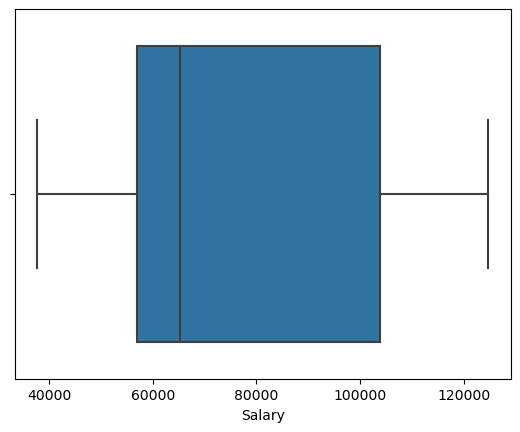

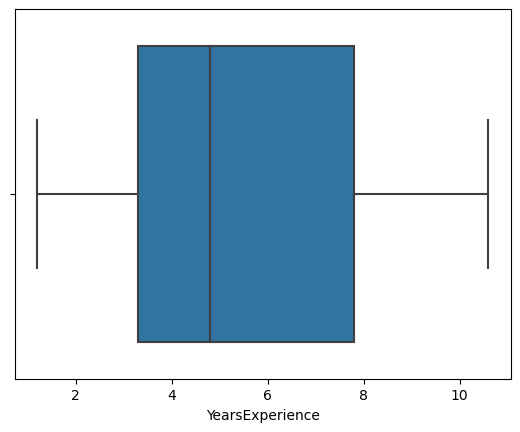

In [10]:
# Box plot for 'Salary'
sns.boxplot(x=df['Salary'])
plt.show()
# Box plot for 'YearsExperience'
sns.boxplot(x=df['YearsExperience'])
plt.show()

plt.show()

# EKSPLORATORY DATA ANALYSIS

In [11]:
# Statistics summary

# Menampilkan ringkasan statistik
summary_statistics = df.describe()

# Menampilkan ringkasan statistik tambahan
median = df.median()
variance = df.var()
skewness = df.skew()
kurtosis = df.kurt()

# Menampilkan hasil
print("Ringkasan Statistik:")
print(summary_statistics)
print("\nMedian:")
print(median)
print("\nVariance:")
print(variance)
print("\nSkewness:")
print(skewness)
print("\nKurtosis:")
print(kurtosis)


Ringkasan Statistik:
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.413333   76395.466333
std           2.837888   27456.616613
min           1.200000   37732.000000
25%           3.300000   56989.000000
50%           4.800000   65238.000000
75%           7.800000  103755.750000
max          10.600000  124745.690000

Median:
YearsExperience        4.8
Salary             65238.0
dtype: float64

Variance:
YearsExperience    8.053609e+00
Salary             7.538658e+08
dtype: float64

Skewness:
YearsExperience    0.379560
Salary             0.345288
dtype: float64

Kurtosis:
YearsExperience   -1.012212
Salary            -1.286372
dtype: float64


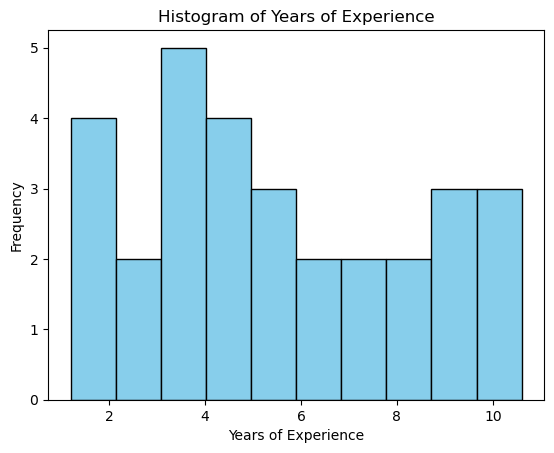

In [12]:
# Membuat histogram YearsExperience
plt.hist(df['YearsExperience'], bins=10, color='skyblue', edgecolor='black')

# Menambahkan label dan judul
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.title('Histogram of Years of Experience')

# Menampilkan histogram
plt.show()

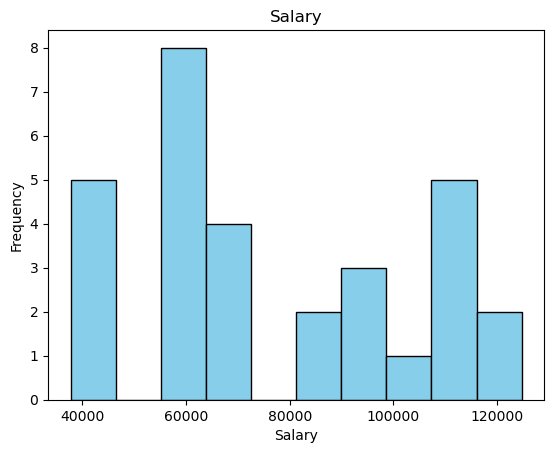

In [13]:
# Membuat histogram YearsExperience
plt.hist(df['Salary'], bins=10, color='skyblue', edgecolor='black')

# Menambahkan label dan judul
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Salary')

# Menampilkan histogram
plt.show()

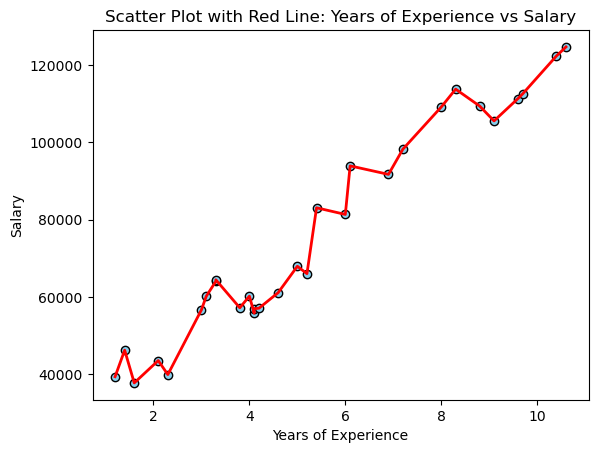

In [14]:
# Membuat scatter plot dengan YearsExperience sebagai sumbu x dan Salary sebagai sumbu y
plt.scatter(df['YearsExperience'], df['Salary'], color='skyblue', edgecolor='black')

# Menambahkan garis dengan warna merah
plt.plot(df['YearsExperience'], df['Salary'], color='red', linestyle='-', linewidth=2)

# Menambahkan label dan judul
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Scatter Plot with Red Line: Years of Experience vs Salary')

# Menampilkan scatter plot
plt.show()


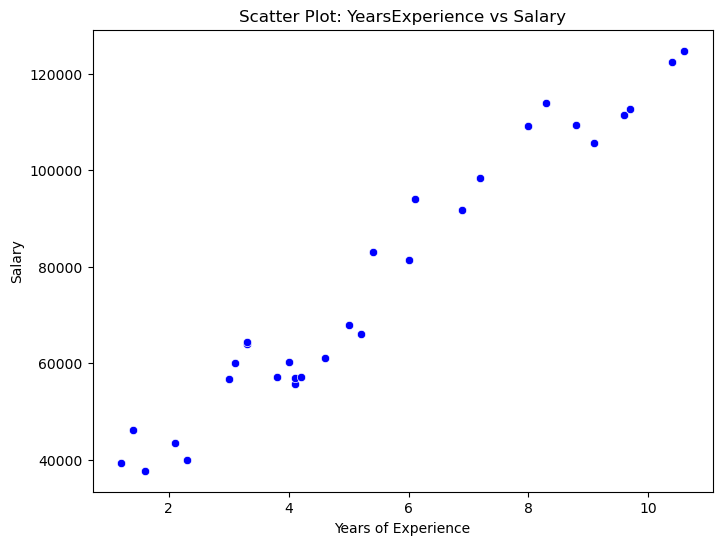

In [15]:
# Visualisasi scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='YearsExperience', y='Salary', data=df, color='blue')
plt.title('Scatter Plot: YearsExperience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

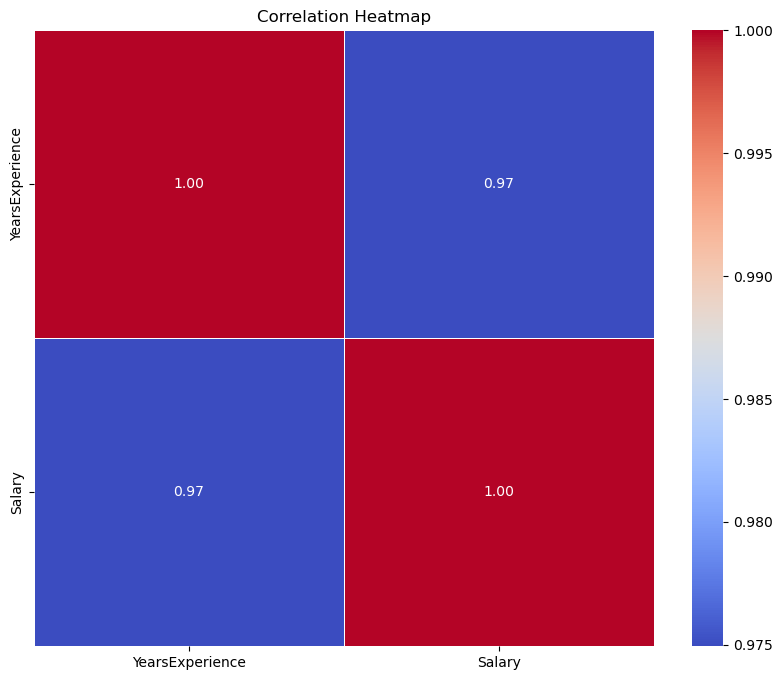

In [16]:
# Membuat heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Menambahkan judul
plt.title("Correlation Heatmap")

# Menampilkan plot
plt.show()


# Modeling

In [17]:
# Memilih fitur yang akan di-scaling
feature_to_scale = 'Salary'

# Min-Max Scaling
min_value = df[feature_to_scale].min()
max_value = df[feature_to_scale].max()


df[feature_to_scale] = (df[feature_to_scale] - min_value) / (max_value - min_value)


# Menampilkan DataFrame setelah scaling
print(df)

# index 2 0.0000 karena ia adalah nilai terkecil / indikator pembagi sehingga ketika dibagi dirinya sendiri menjadi 0

    YearsExperience    Salary
0               1.2  0.018526
1               1.4  0.097387
2               1.6  0.000000
3               2.1  0.066587
4               2.3  0.024824
5               3.0  0.217334
6               3.1  0.257649
7               3.3  0.302248
8               3.3  0.307009
9               3.8  0.223620
10              4.0  0.258212
11              4.1  0.207588
12              4.1  0.220954
13              4.2  0.222379
14              4.6  0.268693
15              5.0  0.347152
16              5.2  0.325213
17              5.4  0.521263
18              6.0  0.501438
19              6.1  0.645979
20              6.9  0.620672
21              7.2  0.695776
22              8.0  0.821265
23              8.3  0.874357
24              8.8  0.824008
25              9.1  0.779774
26              9.6  0.846445
27              9.7  0.860830
28             10.4  0.972950
29             10.6  1.000000


In [27]:
# Train Test split -> 0.3 / random_state

# Mengacak indeks data
np.random.seed(27)  # atur seed untuk reproduktibilitas
indices = np.random.permutation(df.index)

# Hitung jumlah data untuk training set (70%) dan test set (30%)
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

# Bagi data menjadi training set dan test set
train_data = df.loc[indices[:train_size]]
test_data = df.loc[indices[train_size:]]

# Cek ukuran setelah pembagian
print("Ukuran train_data:", train_data.shape)
print("Ukuran test_data:", test_data.shape)

Ukuran train_data: (21, 2)
Ukuran test_data: (9, 2)


# Evaluasi Model

Train R-squared Score: 0.9552354483119498
Test R-squared Score: 0.9354522161066566


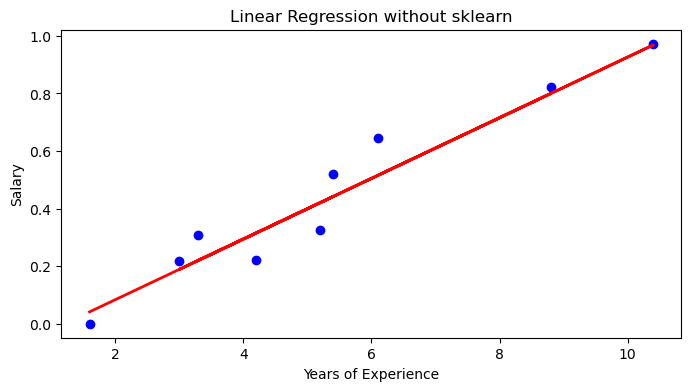

In [28]:
# Pilih kolom yang ingin digunakan untuk prediksi di set pelatihan
X_train = train_data[['YearsExperience']]
y_train = train_data['Salary']

# Tambahkan kolom bias (bias term)
X_train['bias'] = 1

# Pilih kolom yang ingin digunakan untuk prediksi di set pengujian
X_test = test_data[['YearsExperience']]
y_test = test_data['Salary']

# Tambahkan kolom bias (bias term)
X_test['bias'] = 1

# Inisialisasi parameter model (koefisien)
theta = np.zeros(X_train.shape[1])

def predict(X, theta):
    return np.dot(X, theta)

# Definisi fungsi gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        error = predict(X, theta) - y
        gradient = 1/m * np.dot(X.T, error)
        theta -= learning_rate * gradient
    return theta

# Definisi fungsi R-squared Score secara manual
def r2_score_manual(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Melakukan training dengan gradient descent
learning_rate = 0.01
iterations = 1000
theta = gradient_descent(X_train.values, y_train.values, theta, learning_rate, iterations)

# Melakukan prediksi pada set pelatihan
y_train_pred = predict(X_train.values, theta)

# Menghitung R-squared Score pada data train
train_score = r2_score_manual(y_train.values, y_train_pred)
print(f"Train R-squared Score: {train_score}")


# Melakukan prediksi pada set pengujian
y_pred = predict(X_test.values, theta)

# Menghitung R-squared Score pada data test
test_score = r2_score_manual(y_test.values, y_pred)
print(f"Test R-squared Score: {test_score}")

# Membuat scatter plot dan plot regresi linear
plt.figure(figsize=(8, 4))
plt.scatter(X_test['YearsExperience'], y_test, color='blue')
plt.plot(X_test['YearsExperience'], y_pred, color='red', linewidth=2)
plt.title("Linear Regression without sklearn")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()
